# Approach 3: VQE Simulation

## 0 | Setup

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qiskit

# import Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimators
import qiskit_ibm_runtime

In [4]:
print(qiskit.__version__)

2.1.1


In [16]:
!pip install -U qiskit-serverless

/bin/bash: /home/ryukijano/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
print (qiskit_ibm_runtime.__version__)

0.40.1


In [24]:
!pip install -U qiskit-ibm-runtime

/bin/bash: /home/ryukijano/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import qiskit_ibm_runtime
print (qiskit_ibm_runtime.__version__)

0.40.1


In [4]:
!pip install fire-opal

/bin/bash: /home/ryukijano/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 182.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 29.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 164.4 MB/s eta 0

In [ ]:
!pip install qiskit-ibm-catalog

/bin/bash: /home/ryukijano/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 579.4 kB/s eta 0:00:00 0:00:01
INFO: pip is looking at multiple versions of qiskit[qpy-compat] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of ray[default] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opentelemetry-exporter-prometheus to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opentelemetry-exporter-prometheus to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the depe

In [6]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog


In [ ]:
your_api_key = "9cqvrnwt3I8aiSw-FPxC0PvWBcYWIrE-90eps7BUyLbb"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/d4f95db0515b47b7ba61dba8a424f873:e27020ce-4df5-4d23-a715-188a850e36c9::"
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    overwrite=True
)

QiskitServerlessException: Credentials couldn't be verified.

In [13]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog
# QiskitFunctionsCatalog.save_account(token="9cqvrnwt3I8aiSw-FPxC0PvWBcYWIrE-90eps7BUyLbb", overwrite=True)

In [14]:
catalog = QiskitFunctionsCatalog()

QiskitServerlessException: Credentials couldn't be verified.

In [10]:
!pip install qctrl-visualizer

/bin/bash: /home/ryukijano/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.5 MB/s eta 0:00:00


In [11]:
import fireopal as fo
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
import qctrlvisualizer as qv

In [12]:

import qctrl
from qctrl import Qctrl
from qctrl import FireOpal



ModuleNotFoundError: No module named 'qctrl'

## 1 | Hamiltonian
#### **Hamiltonian: Ising Model (4 Qubits)**

The transverse-field Ising model Hamiltonian for 4 qubits is given by:


$$
\begin{align*}
H &= h \sum_{i=0}^{3} Z_i + J \sum_{i=0}^{2} Z_i Z_{i+1}
\\&
= (\text{field terms}) + (\text{interaction terms})
\end{align*}
$$

where:
- $h$ = transverse field strength
- $J$ = coupling constant
- $Z_i$ = Pauli-Z operator acting on qubit \(i\)

### Hamiltonian

In [13]:
from qiskit.quantum_info import SparsePauliOp

def build_ising_hamiltonian(n_qubits, h = 1.0, J = 1.0, periodic=False):
    """
    Build Ising Hamiltonian: 
    H = h Σ Z_i + J Σ Z_i Z_{i+1}
    
    Args:
        n_qubits (int): number of qubits
        h (float): transverse field strength (Z_i)
        J (float): coupling strength (Z_i Z_{i+1})
        periodic (bool): add Z_{N-1} Z_0 term for periodic boundary
    
    Returns:
        SparsePauliOp: Hamiltonian operator
    """
    
    def pauli_string_z(n, qubits):
        """Create a Pauli string for Z operators on specified qubits.""" # express Hamiltonian in terms of Pauli gates/operators
        s = ['I'] * n
        for q in qubits:
            s[q] = 'Z'
        return ''.join(s)

    pauli_terms = [] # list for terms in the Hamiltonian
    
    # Transverse field: h * Z_i
    for i in range(n_qubits):
        pauli_terms.append( (pauli_string_z(n_qubits, [i]), h) )
    
    # Nearest-neighbor interactions: J * Z_i Z_{i+1}
    for i in range(n_qubits - 1):
        pauli_terms.append( (pauli_string_z(n_qubits, [i, i+1]), J) )
    
    if periodic:
        pauli_terms.append( (pauli_string_z(n_qubits, [n_qubits-1, 0]), J) )
    
    # Build SparsePauliOp
    hamiltonian = SparsePauliOp.from_list(pauli_terms)
    return hamiltonian

In [14]:
# construct Hamiltonian by specified paramaeters

# parameters
n_qubits = 4 
h = 1.0
J = 1.0

# create Ising Hamiltonian
H = build_ising_hamiltonian(n_qubits, h, J, periodic=False)
print(H)

SparsePauliOp(['ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'IZZI', 'IIZZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


## 2 | Ansatz (Quantum Circuit)
For now, use a standard VQE quantum circuit called "TwoLocal".

**Source**: Kandala et al., Nature 549, 242–246 (2017)
Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets.
DOI: 10.1038/nature23879

/tmp/ipykernel_41223/224811712.py:6: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(


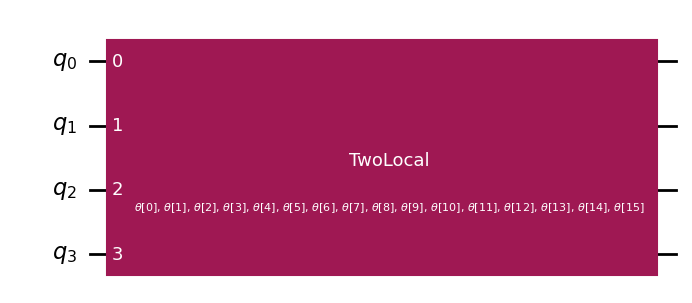

In [15]:
from qiskit.circuit.library import TwoLocal

n_qubits = 4

# Define the ansatz (quantum circuit)
ansatz = TwoLocal(
    num_qubits=n_qubits,
    rotation_blocks='ry',         # single‑qubit rotations: Ry
    entanglement_blocks='cz',     # two‑qubit entanglement: CZ gates
    entanglement='linear',        # linear (nearest‑neighbor) entanglement
    reps=3,                        # number of layers (depth)
    parameter_prefix=r'$\theta$'          # name of parameters
)

# Draw the ansatz circuit (overall)
ansatz.draw("mpl")

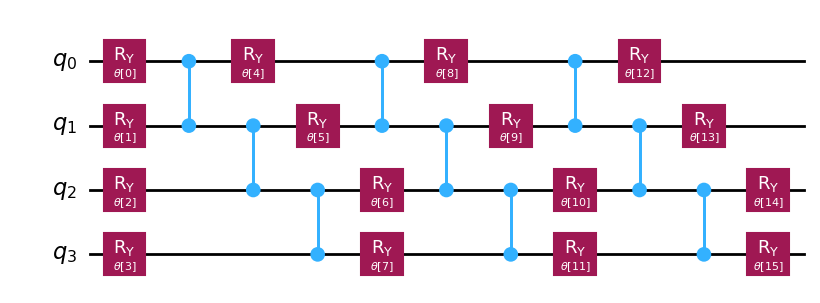

In [20]:
# Draw the ansatz circuit (decomposed)
ansatz.decompose().draw("mpl")

In [21]:
print(f"Number of parameters in ansatz: {len(ansatz.parameters)}")

Number of parameters in ansatz: 16


## 3 | Estimator (backend)

### State vector estimator (perfect processing)

In [ ]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()

In [23]:
# from qiskit.primitives import Estimator
# from qiskit_aer import AerSimulator

# # create AerSimulator backend
# aer_simulator = AerSimulator()

# # create Estimator tied to AerSimulator
# estimator = Estimator(backend=aer_simulator)

In [24]:
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler(mode=session)
    result = sampler.run([isa_qc]).result()

NameError: name 'qc' is not defined

## 4 | Cost function

In [ ]:
# # cost function for VQE
# def original_cost_fn(params, ansatz, hamiltonian, estimator):
#     """    
#     Inputs: 
#     - params: parameters for the ansatz
#     - ansatz: quantum circuit ansatz
#     - hamiltonian: Ising Hamiltonian operator
#     - estimator: Qiskit Estimator for running circuits
    
#     Returns:
#     - energy: expectation value of the Hamiltonian
#     """
#     qc = ansatz.assign_parameters(params) # must bind parameters to the ansatz (??)
#     result = estimator.run([qc], [hamiltonian]).result()
#     energy = result.values[0] # first value is the expected energy
#     return energy

# from functools import partial

# cost_fn = partial(original_cost_fn, ansatz=ansatz, hamiltonian=H, estimator=estimator)

In [ ]:
from functools import partial

def original_cost_fn(params, ansatz, hamiltonian, estimator):
    """    
    Inputs: 
    - params: parameters for the ansatz
    - ansatz: quantum circuit ansatz with free parameters
    - hamiltonian: Ising Hamiltonian operator
    - estimator: Qiskit Estimator
    
    Returns:
    - energy: expectation value of the Hamiltonian
    """
    # NEW: build param_dict mapping each Parameter to its value
    param_dict = dict(zip(ansatz.parameters, params))
    qc = ansatz.assign_parameters(param_dict)
    
    result = estimator.run([qc], [hamiltonian]).result()
    energy = result.values[0]
    return energy

cost_fn = partial(original_cost_fn, ansatz=ansatz, hamiltonian=H, estimator=estimator)

## 5 | Optimiser
Classical optimiser to minimise energy (approx. GS upper bound)

In [ ]:
# create COBYLA optimizer (to get results)
from scipy.optimize import minimize

def cobyla_optimizer(fun, x0, jac=None, bounds=None):
    """
    Wrapper for SciPy COBYLA optimizer.
    """
    result = minimize(
        fun=fun,
        x0=x0,
        method="COBYLA",
        jac=jac,
        bounds=bounds,
        options={"maxiter": 200}
    )
    return result.x, result.fun, result.nfev

## 6 | Run VQE. Extract results

In [ ]:
# initial parameters for the ansatz
x0 = np.random.uniform(0, 2*np.pi, size = len(ansatz.parameters)) # randomly guess initial parameters. 
# require: length of x0 = no. of parameters in the ansatz

# ground_state = (params, ansatz, H, estimator)

optimal_params, optimal_energy, nfev = cobyla_optimizer(cost_fn, x0)

print(f"Optimal parameters: {optimal_params}")
print(f"Estimated ground state energy: {optimal_energy}")
print(f"Function evaluations: {nfev}")

Optimal parameters: [ 0.68466711  1.72714685  6.84414373  4.76582649  0.05027853 -0.08217055
  0.60595249  2.53430772  0.58676115  4.78176814  4.41928449  5.42670916
  2.10578111  6.45692165  5.39333842  0.42500914]
Estimated ground state energy: -2.853515625
Function evaluations: 153


In [ ]:
# initial parameters for the ansatz
x0 = np.random.uniform(0, 2*np.pi, size = len(ansatz.parameters)) # randomly guess initial parameters. 
# require: length of x0 = no. of parameters in the ansatz

# ground_state = (params, ansatz, H, estimator)

optimal_params, optimal_energy, nfev = cobyla_optimizer(cost_fn, x0)

print(f"Optimal parameters: {optimal_params}")
print(f"Estimated ground state energy: {optimal_energy}")
print(f"Function evaluations: {nfev}")

Optimal parameters: [ 2.55912721  5.81468359  0.03274341  5.07481716  5.79169597  2.68008104
  6.0874324   3.07101106  5.44269944  4.44807452  3.23182602  6.24321817
  6.02826136 -1.10205975 -0.02293282  3.56983196]
Estimated ground state energy: -2.994140625
Function evaluations: 187


note: repeat inidividual measurements more. 

use Pennylane to 
QTip

# Discussion

## How do I reach a lower upper bound? 
True GS: -4.

In [ ]:
// ... existing code ...

# Import necessary libraries
import pyscf
from pyscf import gto, scf, mcscf
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal  # For now, use as placeholder
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator

# 1. Define molecule (simple NiH for demo)
mol = gto.M(atom='Ni 0 0 0; H 0 0 1.5', basis='sto-3g', spin=1)  # Adjust spin for Ni
mf = scf.RHF(mol).run()

# 2. Active space (e.g., 2 electrons, 2 orbitals for simplicity)
my_casscf = mcscf.CASSCF(mf, 2, 2).run()

# Extract integrals (one and two-body)
h1 = my_casscf.mo_coeff.T.dot(mf.get_hcore()).dot(my_casscf.mo_coeff)
h2 = pyscf.ao2mo.full(mol, my_casscf.mo_coeff)

# 3. Manual second-quantized Hamiltonian (fermionic)
# For simplicity, assume 4 spin-orbitals (2 spatial * 2 spin)
# Build terms: sum h_pq a_p^dagger a_q + 1/2 sum h_pqrs a_p^dagger a_q^dagger a_r a_s

# 4. Jordan-Wigner mapping to qubits
from qiskit.opflow import FermionicOp, JordanWignerMapper
mapper = JordanWignerMapper()
ferm_op = FermionicOp(...)  # Construct from h1, h2
qubit_op = mapper.map(ferm_op)

# 5. Ansatz (use TwoLocal for now, or implement UCCSD)
ansatz = TwoLocal(num_qubits=qubit_op.num_qubits, rotation_blocks='ry', entanglement_blocks='cz', reps=3)

# 6. VQE setup
optimizer = COBYLA(maxiter=100)
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer)
result = vqe.compute_minimum_eigenvalue(operator=qubit_op)
print(result)

# 7. Q-CTRL integration (basic, assuming qctrl-qiskit installed)
# from qctrlqiskit import QctrlQiskit
# qctrl = QctrlQiskit()
# mitigated_result = qctrl.run_with_mitigation(ansatz, qubit_op)

// ... existing code ...

# Stash/Archived